In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.shape

(21613, 21)

In [3]:
data.columns[data.isnull().sum() > 0]

Index([], dtype='object')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data['age'] = pd.DatetimeIndex(data['date']).year - data['yr_built']
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [7]:
unnecessaryCols = ['id', 'date', 'yr_built', 'yr_renovated', 'zipcode']
data = data.drop(columns=unnecessaryCols, axis=1)

In [8]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,28


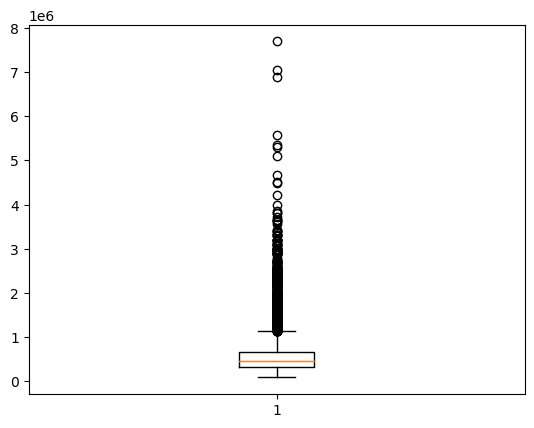

In [9]:
plt.boxplot(data['price'])
plt.show()

In [10]:
data = data[data['price'] <= data['price'].quantile(0.95)]

In [11]:
data.shape

(20532, 17)

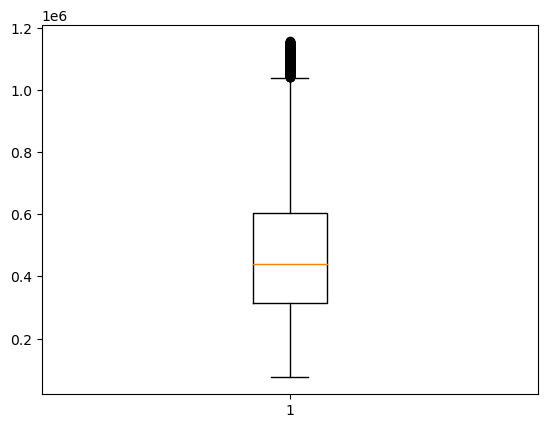

In [12]:
plt.boxplot(data['price'])
plt.show()

In [13]:
train_data, test_data = train_test_split(data, train_size=0.7, random_state=100)
train_data.shape, test_data.shape

((14372, 17), (6160, 17))

In [14]:
X_train = train_data.drop(columns='price', axis=1)
y_train = train_data['price']

X_test = test_data.drop(columns='price', axis=1)
y_test = test_data['price']

### Using adaptive boosting

In [15]:
model = AdaBoostRegressor(n_estimators=100,
                         learning_rate=0.001,
                         loss='linear').fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print('Train r2:\n', r2_score(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print('test r2:\n', r2_score(y_test, y_test_pred))

Train r2:
 0.6549655347348695
test r2:
 0.6560943076253838


### Using gradient boosting

In [16]:
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=1000).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('Train r2:\n', r2_score(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print('test r2:\n', r2_score(y_test, y_test_pred))

Train r2:
 0.9192290169726459
test r2:
 0.8671287953884292


### Using XGBoost

In [17]:
import xgboost as xgb

In [18]:
model = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=1000).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print('Train r2:\n', r2_score(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print('test r2:\n', r2_score(y_test, y_test_pred))

Train r2:
 0.9162273542393847
test r2:
 0.8688435434347809
